# Logistic Regression

### Reading Files and Loading Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#load the dataset
import pandas as pd
data = pd.read_csv("../Deep Learning/diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
data.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Exercise 1: Check for Missing Values and Duplicates and apply pre-processing that will convert 'diabetes' into a binary variable

### Fitting LR Model

Now, let's do a logistic regression example to predict patients who have diabetes based on their attributes.

In [ ]:
#install libraries
# pip install -U scikit-learn

In [4]:
#import libraries for LR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
#split data into X and Y variables
X=data.drop("Diabetes_012",axis=1)
Y=data["Diabetes_012"]

In [6]:
#train/test split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.25 , random_state=42)

Once we split the data into training and testing sets, we fit the model

In [7]:
#logistic regression model
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)

LogisticRegression(max_iter=1500)

Now, we make predictions based on the fitted model

In [8]:
# make predictions on test set
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8460
Test set score: 0.8478


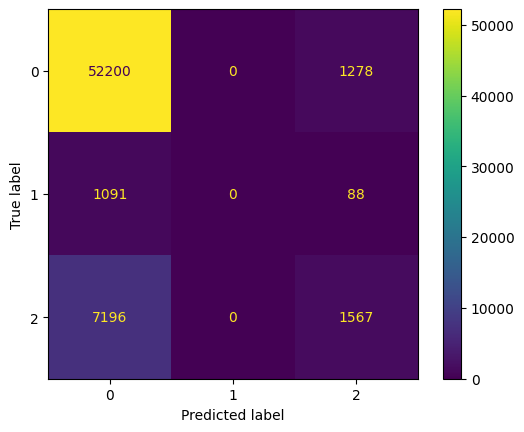

In [9]:
# calculating and plotting the confusion matrix
cm = metrics.confusion_matrix(Y_test,y_pred)
#plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                #show_normed=True,
                                #colorbar=True)
cm = confusion_matrix(Y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

How should we interpret the confusion matrix?

Exercise 2: Try now to optimize the LR model by only using a subset of the variables. Does this improve the train/test accuracy?

Exercise 3: Experiment with the train/test split size and whether it is stratified. 
See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html for documentation

In [ ]:
#define metrics
y_pred_proba = lg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#calculate auc
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
auc

Exercise 4: Compare ROC curve for your various models. Which version has the highest AUC?

### LR to Neural Network

Now we will replicate the LR model above as a neural network and compare the results.

Exercise 5: Run the neural network and compare the ROC/AUC to the LR example.

84
4000004


In [10]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

2023-05-24 14:00:38.604742: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
n_features = X_train.shape[1]
ANN_model = Sequential()
ANN_model.add(InputLayer(input_shape=(n_features, )))
ANN_model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
ANN_model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history = ANN_model.fit(X_train, Y_train, 
                        epochs=5, batch_size=32,
                        validation_split=0.25, 
                        shuffle=False)

In [ ]:
#make predictions
preds=ANN_model.predict(X_test)

In [ ]:
#plot ROC
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()